<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_2)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.062664,49.791428,75.026875,62.988374,0.000461,292.869802,292.860847,0.008956
1,0.0,1.0,77.951836,32.474946,71.094698,89.038885,-0.035115,280.525250,280.558335,-0.033085
2,0.0,2.0,47.378982,88.149532,21.138105,63.263285,0.012711,229.942615,229.940080,0.002535
3,0.0,3.0,99.329566,20.947738,95.886857,21.263353,-0.038751,247.388762,247.414942,-0.026180
4,0.0,4.0,46.498660,75.434417,93.806735,21.943354,-0.014924,247.668242,247.675381,-0.007140
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,47.958201,69.775337,70.566158,92.452335,-0.013577,290.738454,290.753620,-0.015166
59996,999.0,56.0,33.123624,59.482907,90.898888,49.030748,-0.020105,242.516062,242.544562,-0.028500
59997,999.0,57.0,74.515872,68.525925,43.995959,83.935099,-0.004686,280.968169,280.967610,0.000559
59998,999.0,58.0,94.270749,47.712775,75.433415,31.743999,-0.000199,259.160738,259.160906,-0.000169


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.062664  49.791428  75.026875  62.988374  0.000461  292.869802   
      1.0    77.951836  32.474946  71.094698  89.038885 -0.035115  280.525250   
      2.0    47.378982  88.149532  21.138105  63.263285  0.012711  229.942615   
      3.0    99.329566  20.947738  95.886857  21.263353 -0.038751  247.388762   
      4.0    46.498660  75.434417  93.806735  21.943354 -0.014924  247.668242   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   47.958201  69.775337  70.566158  92.452335 -0.013577  290.738454   
      56.0   33.123624  59.482907  90.898888  49.030748 -0.020105  242.516062   
      57.0   74.515872  68.525925  43.995959  83.935099 -0.004686  280.968169   
      58.0   94.270749  47.712775  75.433415  31.743999 -0.000199  259.160738   
      59.0   90.010156  65.244597  46.962992  62.796936  0.024346  275.039026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    292.860847  0.008956  
      1.0    280.558335 -0.033085  
      2.0    229.940080  0.002535  
      3.0    247.414942 -0.026180  
      4.0    247.675381 -0.007140  
...                 ...       ...  
999.0 55.0   290.753620 -0.015166  
      56.0   242.544562 -0.028500  
      57.0   280.967610  0.000559  
      58.0   259.160906 -0.000169  
      59.0   275.008252  0.030774  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.062664  49.791428  75.026875  62.988374  0.000461  292.869802   
      1.0    77.951836  32.474946  71.094698  89.038885 -0.035115  280.525250   
      2.0    47.378982  88.149532  21.138105  63.263285  0.012711  229.942615   
      3.0    99.329566  20.947738  95.886857  21.263353 -0.038751  247.388762   
      4.0    46.498660  75.434417  93.806735  21.943354 -0.014924  247.668242   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   47.958201  69.775337  70.566158  92.452335 -0.013577  290.738454   
      56.0   33.123624  59.482907  90.898888  49.030748 -0.020105  242.516062   
      57.0   74.515872  68.525925  43.995959  83.935099 -0.004686  280.968169   
      58.0   94.270749  47.712775  75.433415  31.743999 -0.000199  259.160738   
      59.0   90.010156  65.244597  46.962992  62.796936  0.024346  275.039026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    292.860847  0.008956  
      1.0    280.558335 -0.033085  
      2.0    229.940080  0.002535  
      3.0    247.414942 -0.026180  
      4.0    247.675381 -0.007140  
...                 ...       ...  
999.0 55.0   290.753620 -0.015166  
      56.0   242.544562 -0.028500  
      57.0   280.967610  0.000559  
      58.0   259.160906 -0.000169  
      59.0   275.008252  0.030774  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,95.062664,49.791428,75.026875,62.988374,0.000461,292.869802,292.860847,0.008956
1,0.0,1.0,77.951836,32.474946,71.094698,89.038885,-0.035115,280.525250,280.558335,-0.033085
2,0.0,2.0,47.378982,88.149532,21.138105,63.263285,0.012711,229.942615,229.940080,0.002535
3,0.0,3.0,99.329566,20.947738,95.886857,21.263353,-0.038751,247.388762,247.414942,-0.026180
4,0.0,4.0,46.498660,75.434417,93.806735,21.943354,-0.014924,247.668242,247.675381,-0.007140
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,47.958201,69.775337,70.566158,92.452335,-0.013577,290.738454,290.753620,-0.015166
59996,999.0,56.0,33.123624,59.482907,90.898888,49.030748,-0.020105,242.516062,242.544562,-0.028500
59997,999.0,57.0,74.515872,68.525925,43.995959,83.935099,-0.004686,280.968169,280.967610,0.000559
59998,999.0,58.0,94.270749,47.712775,75.433415,31.743999,-0.000199,259.160738,259.160906,-0.000169


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    95.062664  49.791428  75.026875  62.988374  0.000461  292.869802   
      1.0    77.951836  32.474946  71.094698  89.038885 -0.035115  280.525250   
      2.0    47.378982  88.149532  21.138105  63.263285  0.012711  229.942615   
      3.0    99.329566  20.947738  95.886857  21.263353 -0.038751  247.388762   
      4.0    46.498660  75.434417  93.806735  21.943354 -0.014924  247.668242   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   47.958201  69.775337  70.566158  92.452335 -0.013577  290.738454   
      56.0   33.123624  59.482907  90.898888  49.030748 -0.020105  242.516062   
      57.0   74.515872  68.525925  43.995959  83.935099 -0.004686  280.968169   
      58.0   94.270749  47.712775  75.433415  31.743999 -0.000199  259.160738   
      59.0   90.010156  65.244597  46.962992  62.796936  0.024346  275.039026   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    292.860847  0.008956  
      1.0    280.558335 -0.033085  
      2.0    229.940080  0.002535  
      3.0    247.414942 -0.026180  
      4.0    247.675381 -0.007140  
...                 ...       ...  
999.0 55.0   290.753620 -0.015166  
      56.0   242.544562 -0.028500  
      57.0   280.967610  0.000559  
      58.0   259.160906 -0.000169  
      59.0   275.008252  0.030774  

[60000 rows x 8 columns]

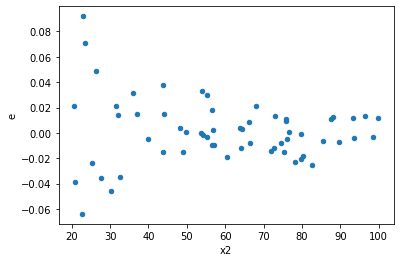

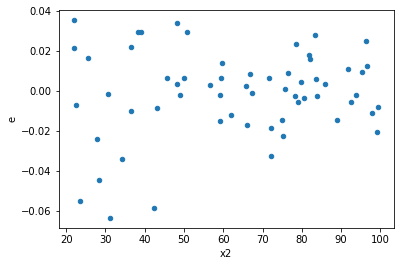

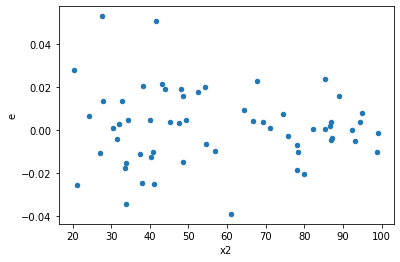

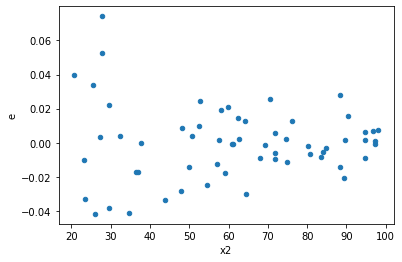

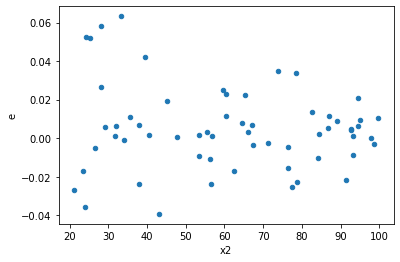

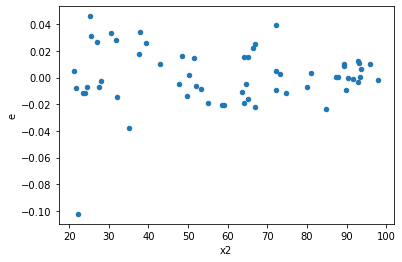

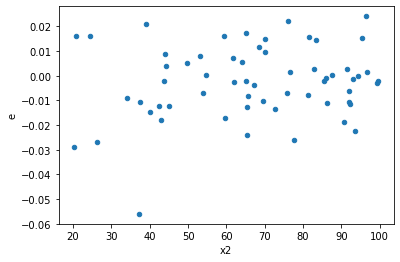

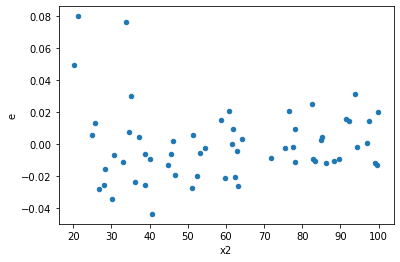

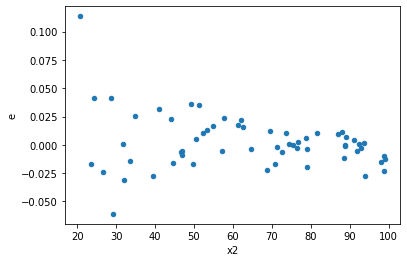

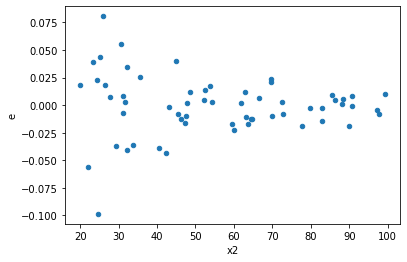

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,26.0,26.0,0.00998875118456064,0.01659085156949548,0.0003841827378677169,0.0006381096757498261,1.6609535329240694,0.20248029969910308,0.8987598501504485,0.10124014984955154,Reject005=1 : Homoscedasticity
3.0,31.0,21.0,0.011777438134677522,0.010481827788624278,0.00037991735918314586,0.0004991346566011561,1.3137979735233405,0.5198209337383723,0.7400895331308138,0.2599104668691862,Reject005=1 : Homoscedasticity
5.0,29.0,23.0,0.005953695189376091,0.019756594685142518,0.00020529983411641696,0.000858982377614892,4.184038342319356,0.0007890876550968873,0.9996054561724516,0.00039454382754844364,Reject005=0 : Heteroscedasticity
6.0,34.0,18.0,0.0070809402881608224,0.00382508805206221,0.0002082629496517889,0.0002125048917812339,1.020368203449233,0.9953340459339186,0.5023329770330407,0.4976670229669593,Reject005=1 : Homoscedasticity
9.0,26.0,26.0,0.009062398467662752,0.029860209072606322,0.00034855378721779815,0.0011484695797156278,3.294956537075273,0.003400002652000911,0.9982999986739995,0.0017000013260004554,Reject005=0 : Heteroscedasticity
11.0,31.0,21.0,0.011688918298311653,0.011455158391188634,0.0003770618805906985,0.0005454837329137445,1.4466689978292138,0.3809696423869089,0.8095151788065456,0.19048482119345445,Reject005=1 : Homoscedasticity
13.0,21.0,31.0,0.0027400596693094794,0.01578553366781462,0.00013047903187187997,0.000509210763477891,3.9026252430957293,0.0006260672062872175,0.9996869663968564,0.00031303360314360873,Reject005=0 : Heteroscedasticity
16.0,22.0,30.0,0.0074873961802344475,0.013174694256652889,0.0003403361900106567,0.00043915647522176294,1.2903607906288543,0.5094031673040382,0.7452984163479809,0.2547015836520191,Reject005=1 : Homoscedasticity
17.0,25.0,27.0,0.00600167883692862,0.014478379298628224,0.0002400671534771448,0.0005362362703195639,2.233692792007114,0.04371814136128149,0.9781409293193593,0.021859070680640746,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,26.0,0.00998875118456064,0.01659085156949548,0.0003841827378677169,0.0006381096757498261,1.6609535329240694,0.20248029969910308,Reject005=1 : Homoscedasticity
1.0,29.0,23.0,0.016166109015396488,0.004952731082367095,0.000557452035013672,0.00021533613401596065,0.3862863896634252,0.016377275808189876,Reject005=0 : Heteroscedasticity
2.0,32.0,20.0,0.012348880428806011,0.002668574045149515,0.00038590251340018785,0.00013342870225747575,0.3457575362280882,0.007201286856293628,Reject005=0 : Heteroscedasticity
3.0,31.0,21.0,0.011777438134677522,0.010481827788624278,0.00037991735918314586,0.0004991346566011561,1.3137979735233405,0.5198209337383723,Reject005=1 : Homoscedasticity
4.0,26.0,26.0,0.013059782094727811,0.007514501882979979,0.0005022993113356851,0.00028901930319153764,0.5753925929601502,0.16544399959115252,Reject005=1 : Homoscedasticity
5.0,29.0,23.0,0.005953695189376091,0.019756594685142518,0.00020529983411641696,0.000858982377614892,4.184038342319356,0.0007890876550968873,Reject005=0 : Heteroscedasticity
6.0,34.0,18.0,0.0070809402881608224,0.00382508805206221,0.0002082629496517889,0.0002125048917812339,1.020368203449233,0.9953340459339186,Reject005=1 : Homoscedasticity
7.0,24.0,28.0,0.01307037145200723,0.007503681992539303,0.0005445988105003012,0.0002679886425906894,0.4920845169391739,0.08155132300514259,Reject005=1 : Homoscedasticity
8.0,28.0,24.0,0.01824275073121849,0.009010165091334881,0.0006515268118292318,0.0003754235454722867,0.576221175638566,0.16178518002241815,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      526
Reject005=0 : Heteroscedasticity    474
Name: Result_test, dtype: int64